[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-2-00e32220ca51>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
<ipython-input-2-00e32220ca51>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])


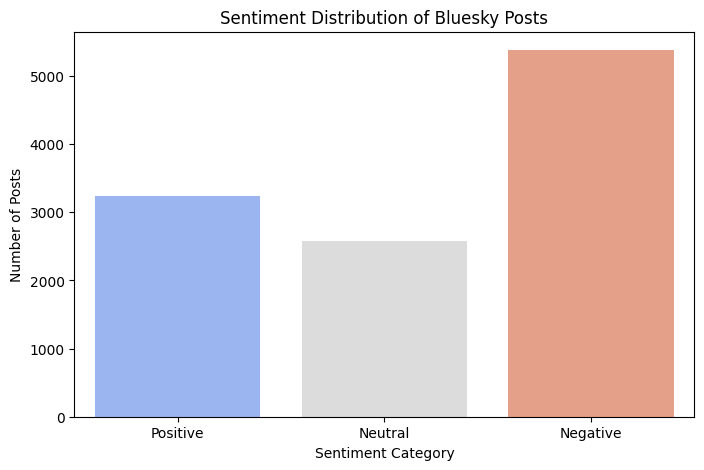

<Figure size 1200x600 with 0 Axes>

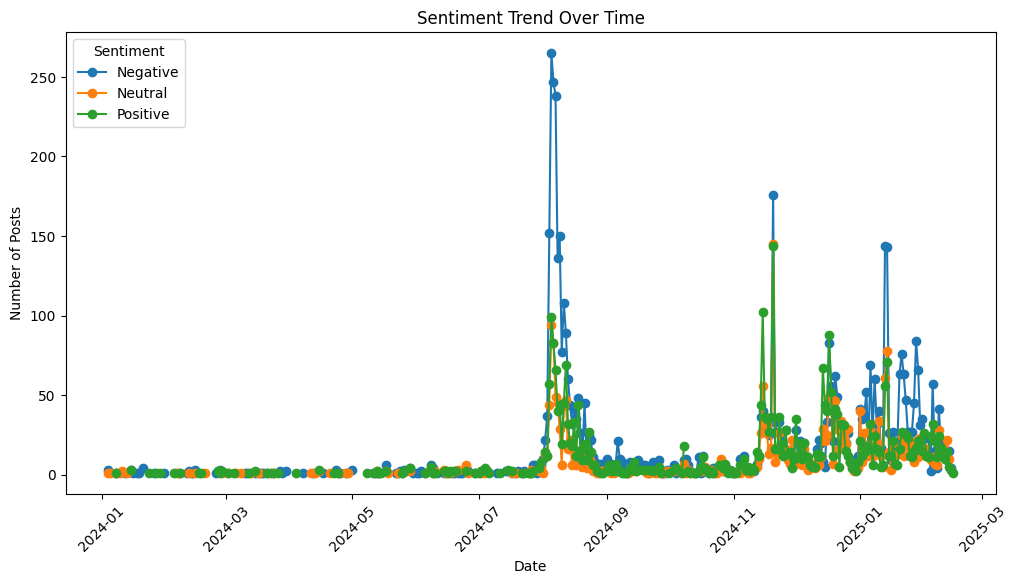

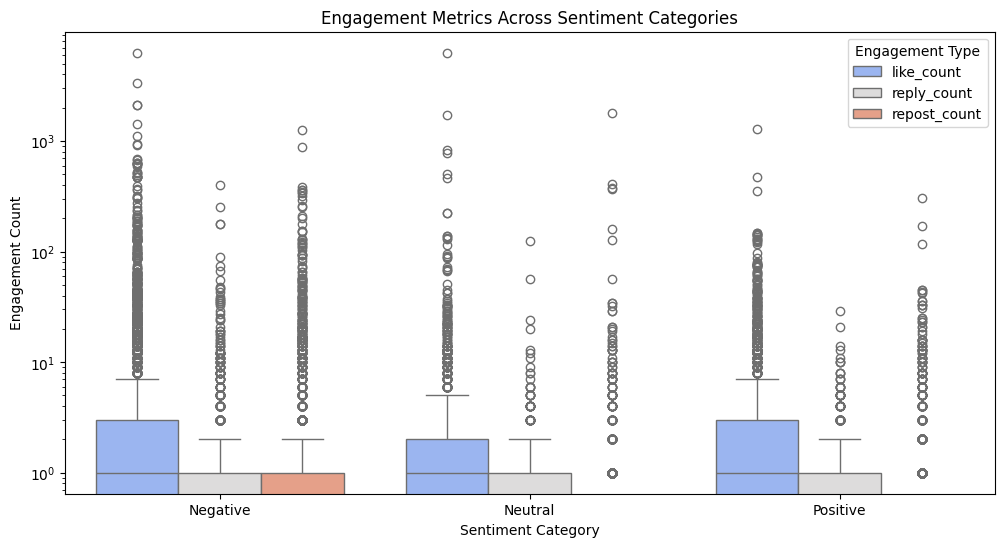

In [2]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# Download required resources
nltk.download('vader_lexicon')

# Load dataset (Replace 'your_file.csv' with actual filename)
df = pd.read_csv("/content/drive/MyDrive/Dessertation/sentiment_results.csv", encoding="latin1")

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['date'])

# ---- 1️⃣ Sentiment Distribution ---- #
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution of Bluesky Posts")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Posts")
plt.show()

# ---- 2️⃣ Sentiment Over Time ---- #
plt.figure(figsize=(12, 6))
df_time = df.groupby([df['date'].dt.date, 'sentiment_label']).size().unstack()
df_time.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment", loc="upper left")
plt.xticks(rotation=45)
plt.show()

# ---- 3️⃣ Sentiment vs Engagement ---- #
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=['sentiment_label'], value_vars=['like_count', 'reply_count', 'repost_count'],
                    var_name='Engagement Type', value_name='Count')

sns.boxplot(data=df_melted, x='sentiment_label', y='Count', hue='Engagement Type', palette='coolwarm')
plt.title("Engagement Metrics Across Sentiment Categories")
plt.xlabel("Sentiment Category")
plt.ylabel("Engagement Count")
plt.yscale("log")  # Log scale to handle outliers
plt.legend(title="Engagement Type")
plt.show()
